# Dependencias del notebook

In [1]:
import pydicom
import dicom_numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
import os

## Definimos los directorios de nuestros archivos ".cvs" que contienen la descripción de nuestro dataset, recomendaciones e imágenes.

In [2]:
training_finding_file = "C:\\Users\\Camilo\\Documents\\Prostatex\\1\\Train\\ProstateX-TrainingLesionInformationv2\\ProstateX-TrainingLesionInformationv2\\ProstateX-Findings-Train.csv"
training_images_file = "C:\\Users\\Camilo\\Documents\\Prostatex\\1\\Train\\ProstateX-TrainingLesionInformationv2\\ProstateX-TrainingLesionInformationv2\\ProstateX-Images-Train.csv"
training_kimages_file = "C:\\Users\\Camilo\\Documents\\Prostatex\\1\\Train\\ProstateX-TrainingLesionInformationv2\\ProstateX-TrainingLesionInformationv2\\ProstateX-Images-KTrans-Train.csv"

# Directorio base de nuestras imágenes

In [3]:
training_images_path = "C:\\Users\\Camilo\\Documents\\Prostatex\\1\\Train\\PROSTATEx"
training_kimages_path = "C:\\Users\\Camilo\\Documents\\Prostatex\\1\\Train\\ProstateXKtrains-train-fixed"


## Definimos las funciones de nuestro notebook

In [4]:
def readFindingsAndImages(training_finding_file, training_images_file, training_kimages_file):
    training_findings = pd.read_csv(training_finding_file)
    training_images =  pd.read_csv(training_images_file)
    training_kimages = pd.read_csv(training_kimages_file)
    return training_findings, training_images, training_kimages

In [5]:
def load_itk(filename):
    # Reads the image using SimpleITK
    itkimage = sitk.ReadImage(filename)
    # Convert the image to a  numpy array first and then shuffle the dimensions to get axis in the order z,y,x
    ct_scan = sitk.GetArrayFromImage(itkimage)
    # Read the origin of the ct_scan, will be used to convert the coordinates from world to voxel and vice versa.
    origin = np.array(list(reversed(itkimage.GetOrigin())))
    # Read the spacing along each dimension
    spacing = np.array(list(reversed(itkimage.GetSpacing())))
    return ct_scan, origin, spacing

In [6]:
def extract_voxel_data(list_of_dicom_files):
    datasets = [pydicom.dcmread(f) for f in list_of_dicom_files]
    try:
        voxel_ndarray, ijk_to_xyz = dicom_numpy.combine_slices(datasets)
    except dicom_numpy.DicomImportException as e:
        # invalid DICOM data
        raise
    return voxel_ndarray

In [7]:
def extract_dicom_image_from_training(number):
    row = training_images.iloc[number]
    display(row)
    actual_image_path = training_images_path+"\\{}".format(row.ProxID)
    actual_image_path = actual_image_path+"\\{}".format(os.listdir(actual_image_path)[0])
    sequences = os.listdir(actual_image_path)
    sequence = [ sequence for sequence in sequences if sequence[0:len(str(row.DCMSerNum))] == str(row.DCMSerNum) ] [0]
    actual_image_path = actual_image_path+"\\{}".format(sequence)
    dicom_images_names = [actual_image_path+"\\{}".format(image_name) for image_name in os.listdir(actual_image_path)]
    display(dicom_images_names)
    dicom_images= extract_voxel_data(dicom_images_names)
    return dicom_images,row.ProxID


In [8]:
training_finding, training_images, training_kimages = readFindingsAndImages(
    training_finding_file, training_images_file, training_kimages_file)

## Imágenes de entrenamiento

In [145]:
display(training_images)

ProxID                                 Name  fid  \
0     ProstateX-0000           ep2d_diff_tra_DYNDIST_ADC0    1   
1     ProstateX-0000               ep2d_diff_tra_DYNDIST0    1   
2     ProstateX-0000               ep2d_diff_tra_DYNDIST1    1   
3     ProstateX-0000               ep2d_diff_tra_DYNDIST2    1   
4     ProstateX-0000      ep2d_diff_tra_DYNDISTCALC_BVAL0    1   
5     ProstateX-0000                          t2_tse_cor0    1   
6     ProstateX-0000                          t2_tse_sag0    1   
7     ProstateX-0000                          t2_tse_tra0    1   
8     ProstateX-0000        tfl_3d_PD_ref_tra_1_5x1_5_t30    1   
9     ProstateX-0001       ep2d_diff_tra_DYNDIST_MIX_ADC0    1   
10    ProstateX-0001           ep2d_diff_tra_DYNDIST_MIX0    1   
11    ProstateX-0001           ep2d_diff_tra_DYNDIST_MIX1    1   
12    ProstateX-0001           ep2d_diff_tra_DYNDIST_MIX2    1   
13    ProstateX-0001  ep2d_diff_tra_DYNDIST_MIXCALC_BVAL0    1   
14    ProstateX-0001                          t2_loc_sag0    1   
15    ProstateX-0001                        t2_localizer0    1   
16    ProstateX-0001                        t2_localizer0    1   
17    ProstateX-0001                          t2_tse_cor0    1   
18    ProstateX-0001                          t2_tse_sag0    1   
19    ProstateX-0001                          t2_tse_tra0    1   
20    ProstateX-0001                          t2_tse_tra0    1   
21    ProstateX-0001        tfl_3d_PD_ref_tra_1_5x1_5_t30    1   
22    ProstateX-0002           ep2d_diff_tra_DYNDIST_ADC0    2   
23    ProstateX-0002           ep2d_diff_tra_DYNDIST_ADC0    1   
24    ProstateX-0002               ep2d_diff_tra_DYNDIST0    2   
25    ProstateX-0002               ep2d_diff_tra_DYNDIST0    1   
26    ProstateX-0002               ep2d_diff_tra_DYNDIST1    2   
27    ProstateX-0002               ep2d_diff_tra_DYNDIST1    1   
28    ProstateX-0002               ep2d_diff_tra_DYNDIST2    2   
29    ProstateX-0002               ep2d_diff_tra_DYNDIST2    1   
...              ...                                  ...  ...   
3839  ProstateX-0203               tfl_3d_dynamisch_fast0    1   
3840  ProstateX-0203               tfl_3d_dynamisch_fast0    2   
3841  ProstateX-0203               tfl_3d_dynamisch_fast0    1   
3842  ProstateX-0203               tfl_3d_dynamisch_fast0    2   
3843  ProstateX-0203               tfl_3d_dynamisch_fast0    1   
3844  ProstateX-0203               tfl_3d_dynamisch_fast0    2   
3845  ProstateX-0203               tfl_3d_dynamisch_fast0    1   
3846  ProstateX-0203               tfl_3d_dynamisch_fast0    2   
3847  ProstateX-0203               tfl_3d_dynamisch_fast0    1   
3848  ProstateX-0203               tfl_3d_dynamisch_fast0    2   
3849  ProstateX-0203               tfl_3d_dynamisch_fast0    1   
3850  ProstateX-0203               tfl_3d_dynamisch_fast0    2   
3851  ProstateX-0203               tfl_3d_dynamisch_fast0    1   
3852  ProstateX-0203               tfl_3d_dynamisch_fast0    2   
3853  ProstateX-0203               tfl_3d_dynamisch_fast0    1   
3854  ProstateX-0203               tfl_3d_dynamisch_fast0    2   
3855  ProstateX-0203               tfl_3d_dynamisch_fast0    1   
3856  ProstateX-0203               tfl_3d_dynamisch_fast0    2   
3857  ProstateX-0203               tfl_3d_dynamisch_fast0    1   
3858  ProstateX-0203               tfl_3d_dynamisch_fast0    2   
3859  ProstateX-0203               tfl_3d_dynamisch_fast0    1   
3860  ProstateX-0203               tfl_3d_dynamisch_fast0    2   
3861  ProstateX-0203               tfl_3d_dynamisch_fast0    1   
3862  ProstateX-0203               tfl_3d_dynamisch_fast0    2   
3863  ProstateX-0203               tfl_3d_dynamisch_fast0    1   
3864  ProstateX-0203               tfl_3d_dynamisch_fast0    2   
3865  ProstateX-0203               tfl_3d_dynamisch_fast0    1   
3866  ProstateX-0203               tfl_3d_dynamisch_fast0    2   
3867  ProstateX-0203                 tfl_3d_PD_referen

## KImagenes de entrenamiento

In [146]:
display(training_kimages)

ProxID  fid                                                pos  \
0    ProstateX-0000    1                            25.7457 31.8707 -38.511   
1    ProstateX-0001    1  -40.5367071921656 29.320722668457 -16.70766907...   
2    ProstateX-0002    1                          -27.0102 41.5467 -26.0469   
3    ProstateX-0002    2                            -2.058 38.6752 -34.6104   
4    ProstateX-0003    1                           22.1495 31.2717 -2.45933   
5    ProstateX-0003    2                           -21.2871 19.3995 19.7429   
6    ProstateX-0004    1                           -7.69665 3.64226 23.1659   
7    ProstateX-0005    0  -14.5174331665039 49.4428329467773 20.78152465...   
8    ProstateX-0005    1  -22.0892639160156 25.4668045043945 22.87915420...   
9    ProstateX-0005    1                           -38.6276 42.2781 21.4084   
10   ProstateX-0006    1                           8.20024 28.2665 -10.4784   
11   ProstateX-0006    2                          -9.85971 37.2739 0.561445   
12   ProstateX-0007    1                             -5.4258 20.1075 -57.34   
13   ProstateX-0008    1                            25.2302 38.6613 -26.864   
14   ProstateX-0009    1                            19.565 32.8037 -37.4421   
15   ProstateX-0010    1                           -31.8128 51.364 -56.0047   
16   ProstateX-0011    1                            9.29795 10.7009 14.2935   
17   ProstateX-0012    1                           4.08778 49.7898 -3.71828   
18   ProstateX-0012    2  3.41538238525391 16.3572769165039 6.3640995025...   
19   ProstateX-0013    1                           -42.7915 30.7382 5.60159   
20   ProstateX-0014    1                           -23.0672 31.7673 3.02353   
21   ProstateX-0015    1                                    -3.5 -4.2 -40.5   
22   ProstateX-0016    1                          -17.4648 10.7487 -1.55198   
23   ProstateX-0017    1                           2.89097 49.4408 -14.4697   
24   ProstateX-0018    1                           4.08917 18.7769 -11.5951   
25   ProstateX-0019    1                          -4.21012 42.1916 -40.6457   
26   ProstateX-0020    1                            10.1617 53.5994 10.0223   
27   ProstateX-0021    2                             13.33 33.2901 -26.3378   
28   ProstateX-0021    4                           38.7099 28.8409 -28.6634   
29   ProstateX-0022    1                          -22.5143 51.5685 -107.645   
..              ...  ...                                                ...   
305  ProstateX-0187    4                           28.2186 12.6441 -8.76523   
306  ProstateX-0188    1                          -28.3426 16.8586 -14.8499   
307  ProstateX-0189    1                             18.4185 36.54 -10.9865   
308  ProstateX-0189    2                            5.92835 37.8942 5.98516   
309  ProstateX-0189    3                           8.35175 26.1661 -23.7111   
310  ProstateX-0190    1                           7.16203 24.1384 -43.6284   
311  ProstateX-0190    2                           18.0346 25.0828 -33.7677   
312  ProstateX-0191    1                          20.7818 18.0177 -0.799461   
313  ProstateX-0192    1                           31.2186 41.3789 -1.29214   
314  ProstateX-0192    2                            4.38277 45.7107 13.0712   
315  ProstateX-0193    1                            7.42249 10.9888 10.3919   
316  ProstateX-0193    2                            20.1375 43.9469 9.68558   
317  ProstateX-0193    3                           -2.47701 42.2325 21.9024   
318  ProstateX-0193    4                           7.42249 43.3791 0.138344   
319  ProstateX-0194    1                           -31.1794 27.3023 13.8725   
320  ProstateX-0195    1                            -13.0258 7.2252 17.6683   
321  ProstateX-0196    1                           12.1189 32.1358 -5.88878   
322  ProstateX-0196    2                           35.2755 27.3587 -8.26241   
323  ProstateX-0196    3                            7.7081 18.6

## Recomendaciones del dataset

In [9]:
display(training_finding)

ProxID  fid                                                pos  \
0    ProstateX-0000    1                            25.7457 31.8707 -38.511   
1    ProstateX-0001    1  -40.5367071921656 29.320722668457 -16.70766907...   
2    ProstateX-0002    1                          -27.0102 41.5467 -26.0469   
3    ProstateX-0002    2                            -2.058 38.6752 -34.6104   
4    ProstateX-0003    1                           22.1495 31.2717 -2.45933   
5    ProstateX-0003    2                           -21.2871 19.3995 19.7429   
6    ProstateX-0004    1                           -7.69665 3.64226 23.1659   
7    ProstateX-0005    0  -14.5174331665039 49.4428329467773 20.78152465...   
8    ProstateX-0005    1                           -38.6276 42.2781 21.4084   
9    ProstateX-0005    1  -22.0892639160156 25.4668045043945 22.87915420...   
10   ProstateX-0006    1                           8.20024 28.2665 -10.4784   
11   ProstateX-0006    2                          -9.85971 37.2739 0.561445   
12   ProstateX-0007    1                             -5.4258 20.1075 -57.34   
13   ProstateX-0008    1                            25.2302 38.6613 -26.864   
14   ProstateX-0009    1                            19.565 32.8037 -37.4421   
15   ProstateX-0010    1                           -31.8128 51.364 -56.0047   
16   ProstateX-0011    1                            9.29795 10.7009 14.2935   
17   ProstateX-0012    1                           4.08778 49.7898 -3.71828   
18   ProstateX-0012    2  3.41538238525391 16.3572769165039 6.3640995025...   
19   ProstateX-0013    1                           -42.7915 30.7382 5.60159   
20   ProstateX-0014    1                           -23.0672 31.7673 3.02353   
21   ProstateX-0015    1                                    -3.5 -4.2 -40.5   
22   ProstateX-0016    1                          -17.4648 10.7487 -1.55198   
23   ProstateX-0017    1                           2.89097 49.4408 -14.4697   
24   ProstateX-0018    1                           4.08917 18.7769 -11.5951   
25   ProstateX-0019    1                          -4.21012 42.1916 -40.6457   
26   ProstateX-0020    1                            10.1617 53.5994 10.0223   
27   ProstateX-0021    2                             13.33 33.2901 -26.3378   
28   ProstateX-0021    4                           38.7099 28.8409 -28.6634   
29   ProstateX-0022    1                          -22.5143 51.5685 -107.645   
..              ...  ...                                                ...   
300  ProstateX-0187    4                           28.2186 12.6441 -8.76523   
301  ProstateX-0188    1                          -28.3426 16.8586 -14.8499   
302  ProstateX-0189    1                             18.4185 36.54 -10.9865   
303  ProstateX-0189    2                            5.92835 37.8942 5.98516   
304  ProstateX-0189    3                           8.35175 26.1661 -23.7111   
305  ProstateX-0190    1                           7.16203 24.1384 -43.6284   
306  ProstateX-0190    2                           18.0346 25.0828 -33.7677   
307  ProstateX-0191    1                          20.7818 18.0177 -0.799461   
308  ProstateX-0192    1                           31.2186 41.3789 -1.29214   
309  ProstateX-0192    2                            4.38277 45.7107 13.0712   
310  ProstateX-0193    1                            7.42249 10.9888 10.3919   
311  ProstateX-0193    2                            20.1375 43.9469 9.68558   
312  ProstateX-0193    3                           -2.47701 42.2325 21.9024   
313  ProstateX-0193    4                           7.42249 43.3791 0.138344   
314  ProstateX-0194    1                           -31.1794 27.3023 13.8725   
315  ProstateX-0195    1                            -13.0258 7.2252 17.6683   
316  ProstateX-0196    1                           12.1189 32.1358 -5.88878   
317  ProstateX-0196    2                           35.2755 27.3587 -8.26241   
318  ProstateX-0196    3                            7.7081 18.6

## Elegimos una Sequencia de imagenes de un paciente de forma aleatoria

In [20]:
number = np.random.randint(0,len(training_images))
dicom_imgs,dicom_patient = extract_dicom_image_from_training(number)

ProxID                                                     ProstateX-0106
Name                                                          t2_tse_tra0
fid                                                                     2
pos                                               24.5215 11.1916 4.30617
WorldMatrix             0.5,1.02552e-010,-4.64581e-017,-68.121,-1.0193...
ijk                                                             185 155 6
TopLevel                                                              NaN
SpacingBetweenSlices                                                    3
VoxelSpacing                                                    0.5,0.5,3
Dim                                                          384x384x19x1
DCMSerDescr                                                    t2_tse_tra
DCMSerNum                                                               5
Name: 1633, dtype: object

['C:\\Users\\Camilo\\Documents\\Prostatex\\1\\Train\\PROSTATEx\\ProstateX-0106\\01-12-2012-MR prostaat kanker detectiemc MCAPRODET-58881\\5-t2tsetra-03432\\000000.dcm',
 'C:\\Users\\Camilo\\Documents\\Prostatex\\1\\Train\\PROSTATEx\\ProstateX-0106\\01-12-2012-MR prostaat kanker detectiemc MCAPRODET-58881\\5-t2tsetra-03432\\000001.dcm',
 'C:\\Users\\Camilo\\Documents\\Prostatex\\1\\Train\\PROSTATEx\\ProstateX-0106\\01-12-2012-MR prostaat kanker detectiemc MCAPRODET-58881\\5-t2tsetra-03432\\000002.dcm',
 'C:\\Users\\Camilo\\Documents\\Prostatex\\1\\Train\\PROSTATEx\\ProstateX-0106\\01-12-2012-MR prostaat kanker detectiemc MCAPRODET-58881\\5-t2tsetra-03432\\000003.dcm',
 'C:\\Users\\Camilo\\Documents\\Prostatex\\1\\Train\\PROSTATEx\\ProstateX-0106\\01-12-2012-MR prostaat kanker detectiemc MCAPRODET-58881\\5-t2tsetra-03432\\000004.dcm',
 'C:\\Users\\Camilo\\Documents\\Prostatex\\1\\Train\\PROSTATEx\\ProstateX-0106\\01-12-2012-MR prostaat kanker detectiemc MCAPRODET-58881\\5-t2tsetra-03432\

ProstateX-0106


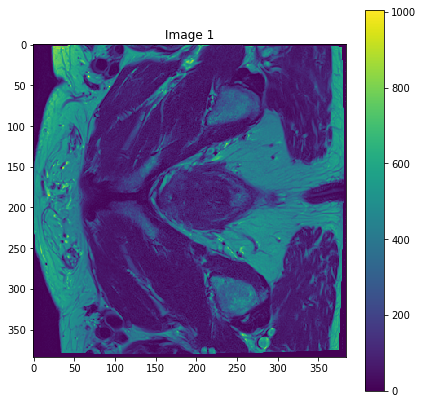

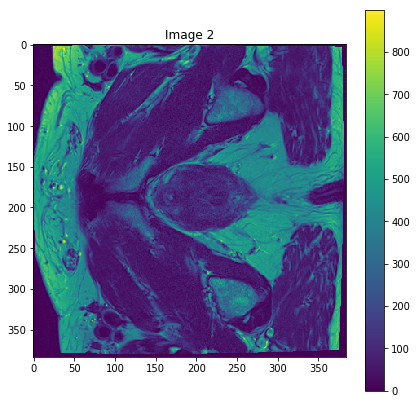

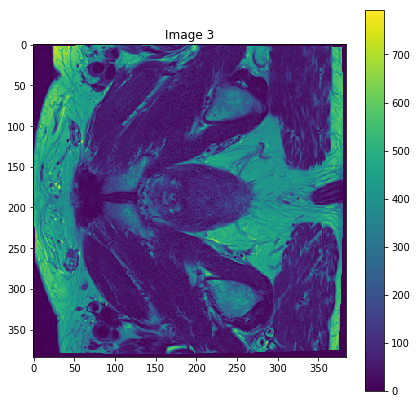

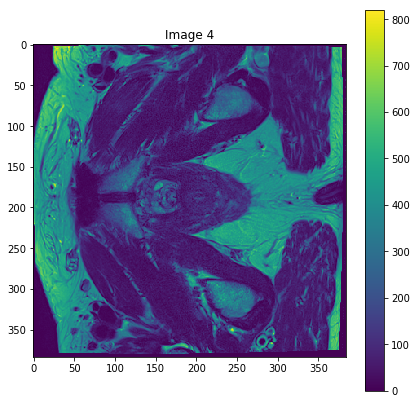

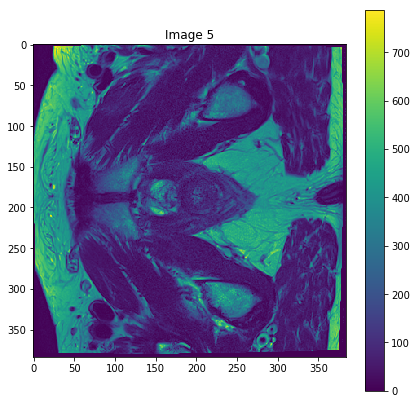

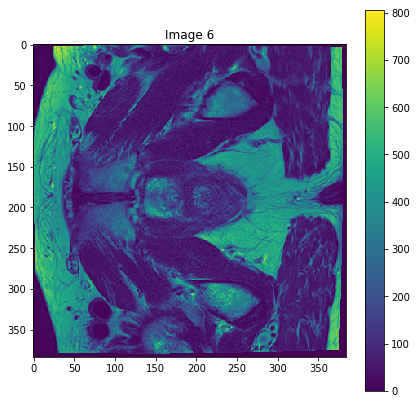

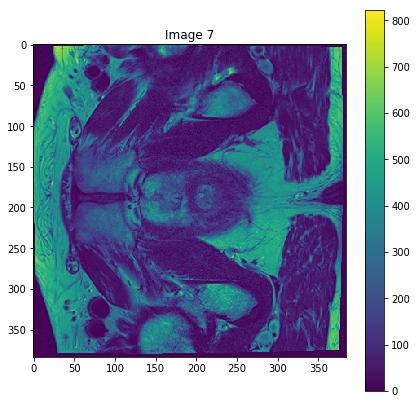

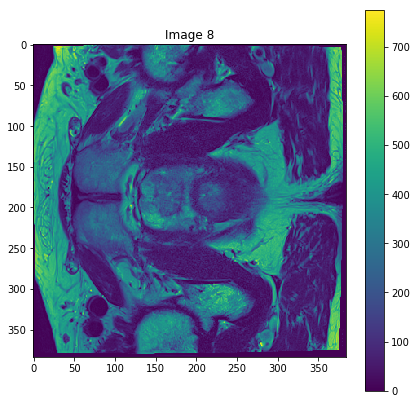

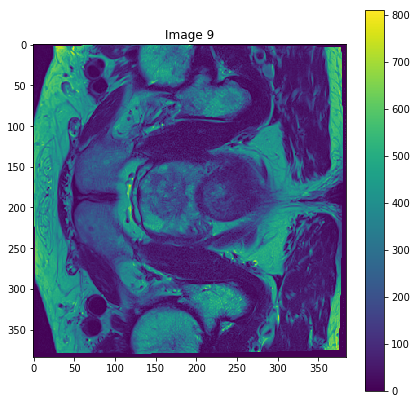

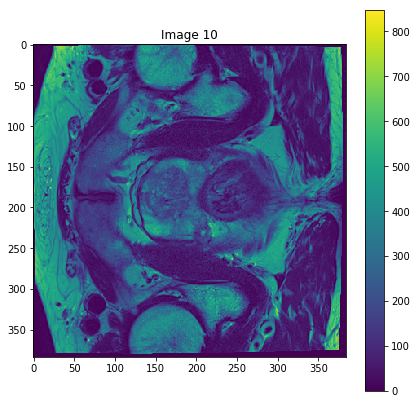

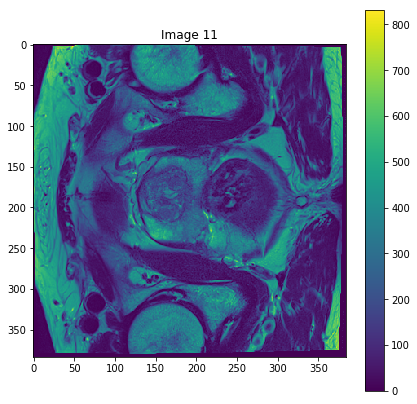

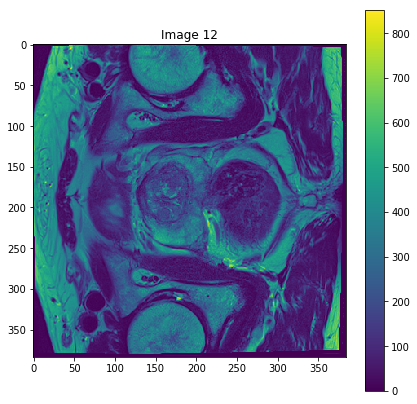

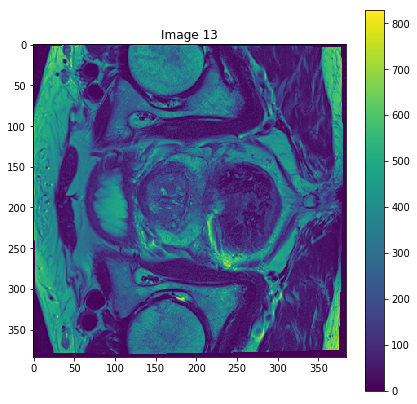

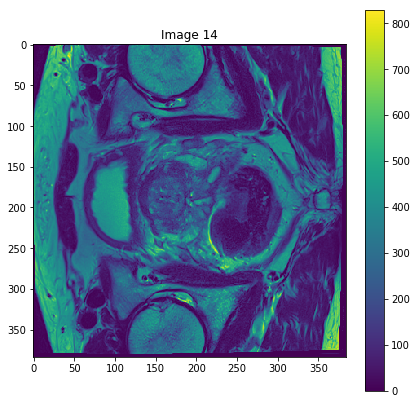

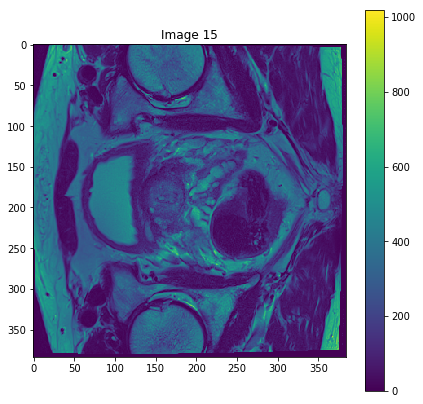

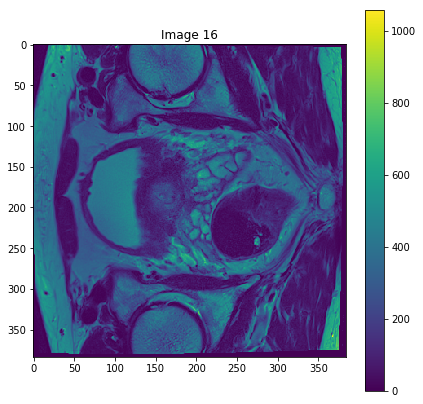

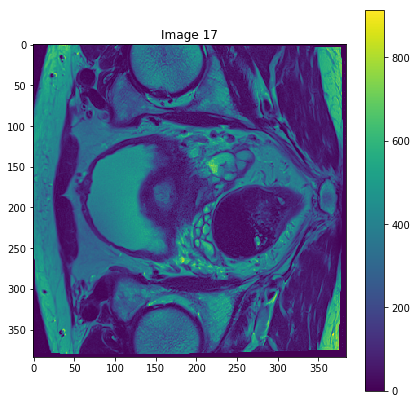

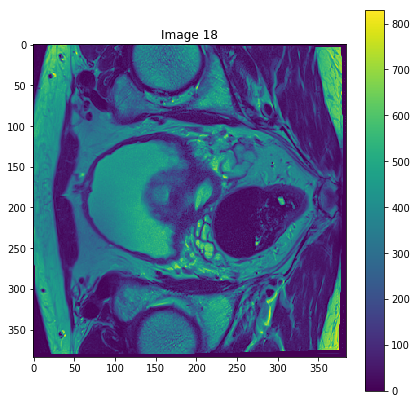

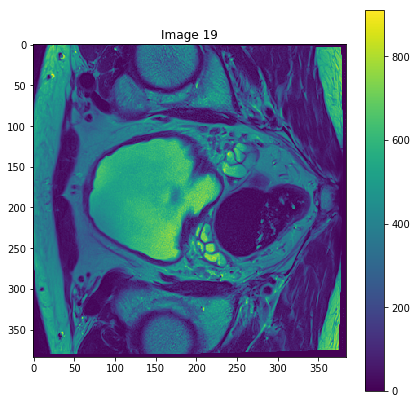

In [21]:
print(dicom_patient)
for i in range (dicom_imgs.shape[2]):
    plt.figure(figsize=(7,7));
    plt.imshow(dicom_imgs[:,:,i])
    plt.title("Image {}".format(i+1))
    plt.colorbar()
    

# mostramos las recomendaciones dadas para el paciente seleccionado

 A continuación mostramos las recomendaciones para el paciente seleccionado:

In [22]:
training_finding[training_finding.ProxID == dicom_patient].sort_values(["pos"])

ProxID  fid                      pos zone  ClinSig
155  ProstateX-0106    1  11.6356 42.7856 21.9458   PZ    False
156  ProstateX-0106    2  24.5215 11.1916 4.30617   AS     True

Mostramos la descripción de la K image

In [23]:
training_kimages[training_kimages.ProxID == dicom_patient]

ProxID  fid                      pos  \
160  ProstateX-0106    1  11.6356 42.7856 21.9458   
161  ProstateX-0106    2  24.5215 11.1916 4.30617   

                                           WorldMatrix       ijk  
160  1.5,3.07655e-010,-4.64581e-017,-68.621,-3.0579...  54 72 11  
161  1.5,3.07655e-010,-4.64581e-017,-68.621,-3.0579...   62 52 4

Mostramos la descripción de la imágen

In [24]:
 training_images[training_images.ProxID == dicom_patient].sort_values(["pos" , "DCMSerNum"])

ProxID                             Name  fid  \
1632  ProstateX-0106                      t2_tse_sag0    1   
1634  ProstateX-0106                      t2_tse_tra0    1   
1630  ProstateX-0106                      t2_tse_cor0    1   
1622  ProstateX-0106           ep2d_diff_tra_DYNDIST0    1   
1624  ProstateX-0106           ep2d_diff_tra_DYNDIST1    1   
1626  ProstateX-0106           ep2d_diff_tra_DYNDIST2    1   
1620  ProstateX-0106       ep2d_diff_tra_DYNDIST_ADC0    1   
1628  ProstateX-0106  ep2d_diff_tra_DYNDISTCALC_BVAL0    1   
1636  ProstateX-0106    tfl_3d_PD_ref_tra_1_5x1_5_t30    1   
1631  ProstateX-0106                      t2_tse_sag0    2   
1633  ProstateX-0106                      t2_tse_tra0    2   
1629  ProstateX-0106                      t2_tse_cor0    2   
1621  ProstateX-0106           ep2d_diff_tra_DYNDIST0    2   
1623  ProstateX-0106           ep2d_diff_tra_DYNDIST1    2   
1625  ProstateX-0106           ep2d_diff_tra_DYNDIST2    2   
1619  ProstateX-0106       ep2d_diff_tra_DYNDIST_ADC0    2   
1627  ProstateX-0106  ep2d_diff_tra_DYNDISTCALC_BVAL0    2   
1635  ProstateX-0106    tfl_3d_PD_ref_tra_1_5x1_5_t30    2   

                          pos  \
1632  11.6356 42.7856 21.9458   
1634  11.6356 42.7856 21.9458   
1630  11.6356 42.7856 21.9458   
1622  11.6356 42.7856 21.9458   
1624  11.6356 42.7856 21.9458   
1626  11.6356 42.7856 21.9458   
1620  11.6356 42.7856 21.9458   
1628  11.6356 42.7856 21.9458   
1636  11.6356 42.7856 21.9458   
1631  24.5215 11.1916 4.30617   
1633  24.5215 11.1916 4.30617   
1629  24.5215 11.1916 4.30617   
1621  24.5215 11.1916 4.30617   
1623  24.5215 11.1916 4.30617   
1625  24.5215 11.1916 4.30617   
1619  24.5215 11.1916 4.30617   
1627  24.5215 11.1916 4.30617   
1635  24.5215 11.1916 4.30617   

                                            WorldMatrix         ijk  TopLevel  \
1632  0,0,-3.6,66.9711,0.5625,0,0,-62.9216,0,-0.5625...  188 154 15       NaN   
1634  0.5,1.02552e-010,-4.64581e-017,-68.121,-1.0193...  160 214 13       NaN   
1630  0.6,0,0,-65.2747,0,-0.158324,2.89367,22.8804,0...  128 157 15       NaN   
1622  2,4.10207e-010,-4.64581e-017,-56.871,-4.0773e-...    34 70 13       NaN   
1624  2,4.10207e-010,-4.64581e-017,-56.871,-4.0773e-...    34 70 13       NaN   
1626  2,4.10207e-010,-4.64581e-017,-56.871,-4.0773e-...    34 70 13       NaN   
1620  2,4.10207e-010,-4.64581e-017,-56.871,-4.0773e-...    34 70 13       NaN   
1628  2,4.10207e-010,-4.64581e-017,-56.871,-4.0773e-...    34 70 13       NaN   
1636  1.5,3.07655e-010,-4.64581e-017,-68.621,-3.0579...    54 72 11       NaN   
1631  0,0,-3.6,66.9711,0.5625,0,0,-62.9216,0,-0.5625...  132 185 12       NaN   
1633  0.5,1.02552e-010,-4.64581e-017,-68.121,-1.0193...   185 155 6       NaN   
1629  0.6,0,0,-65.2747,0,-0.158324,2.89367,22.8804,0...   150 199 7       NaN   
1621  2,4.10207e-010,-4.64581e-017,-56.871,-4.0773e-...     41 55 6       NaN   
1623  2,4.10207e-010,-4.64581e-017,-56.871,-4.0773e-...     41 55 6       NaN   
1625  2,4.10207e-010,-4.64581e-017,-56.871,-4.0773e-...     41 55 6       NaN   
1619  2,4.10207e-010,-4.64581e-017,-56.871,-4.0773e-...     41 55 6       NaN   
1627  2,4.10207e-010,-4.64581e-017,-56.871,-4.0773e-...     41 55 6       NaN   
1635  1.5,3.07655e-010,-4.64581e-017,-68.621,-3.0579...     62 52 4       NaN   

      SpacingBetweenSlices       VoxelSpacing           Dim  \
1632                   3.6  0.5625,0.5625,3.6  320x320x19x1   
1634                   3.0          0.5,0.5,3  384x384x19x1   
1630                   3.0          0.6,0.6,3  320x320x17x1   
1622                   3.0              2,2,3   84x128x19x1   
1624                   3.0              2,2,3   84x128x19x1   
1626                   3.0              2,2,3   84x128x19x1   
1620                   3.0              2,2,3   84x128x19x1   
1628                   3.0              2,2,3   84x128x19x1   
1636                   3.0          1.5,1.5,3  128x128x16x1   
1631                   3.6  0.5625,0.

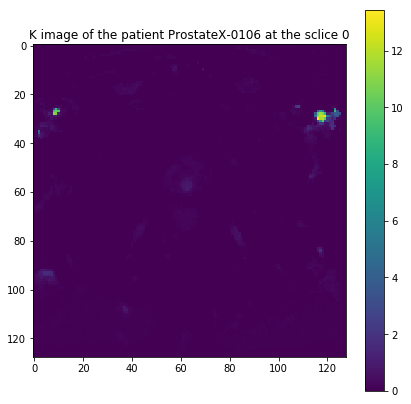

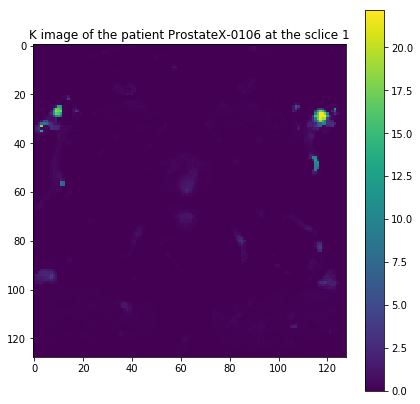

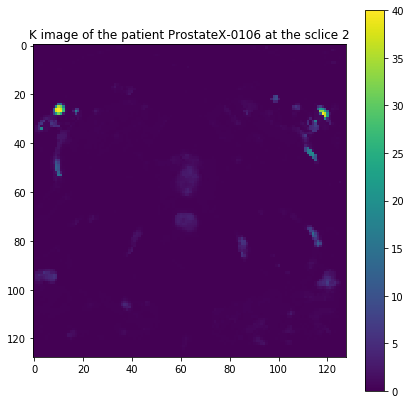

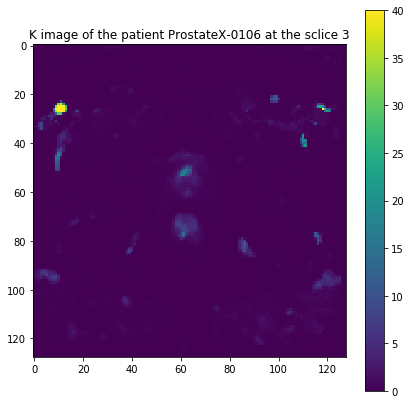

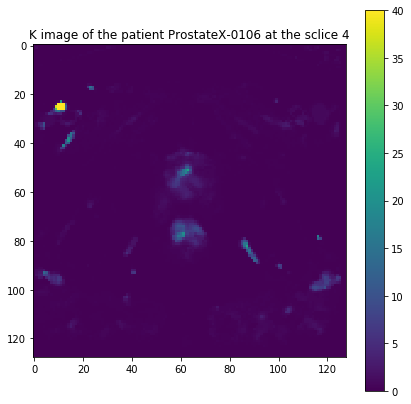

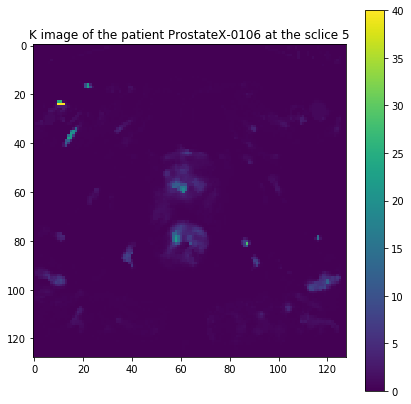

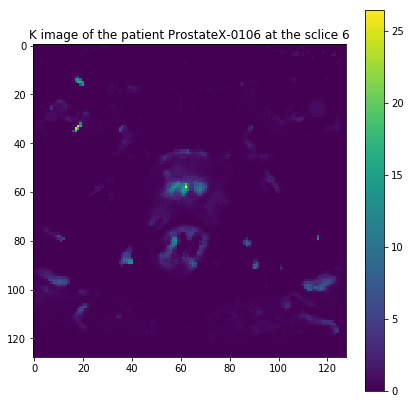

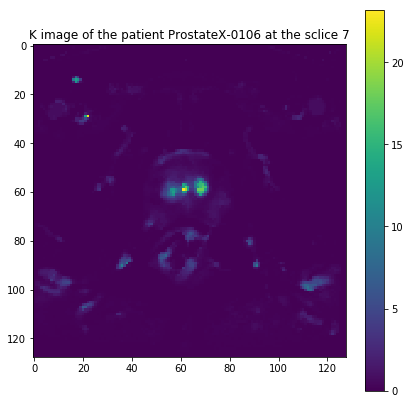

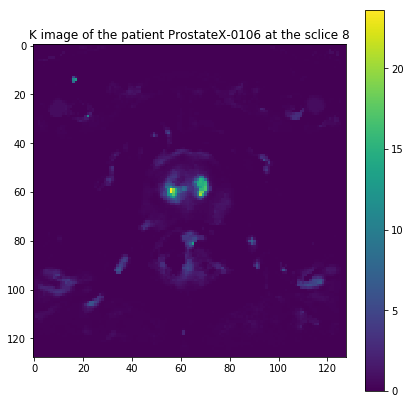

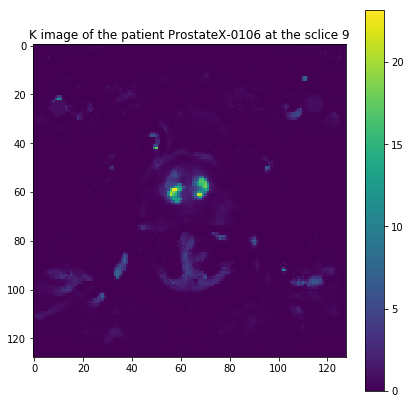

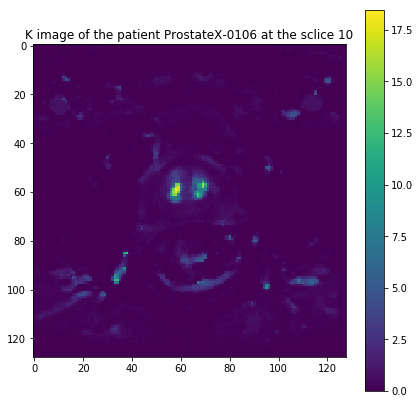

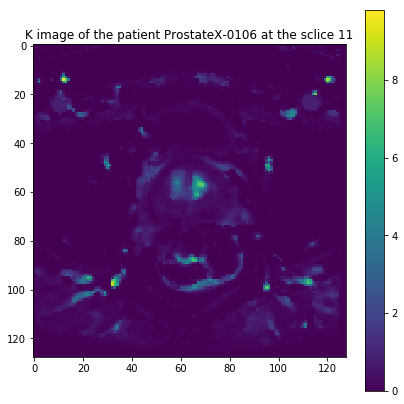

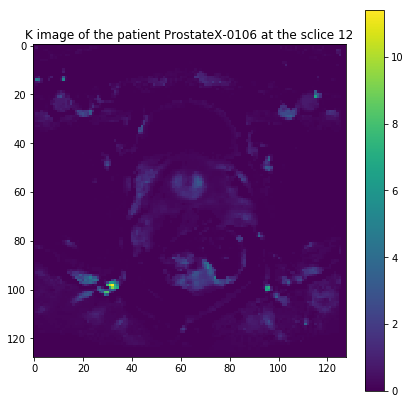

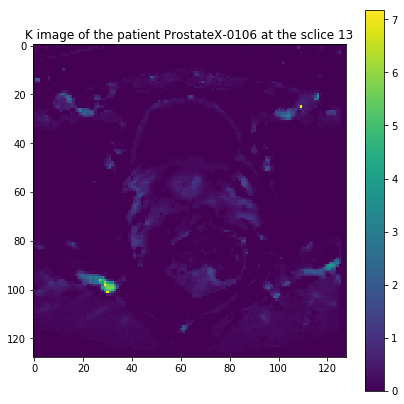

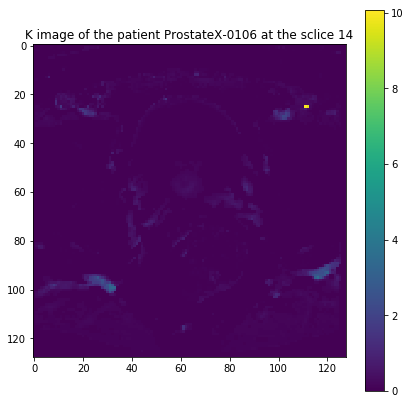

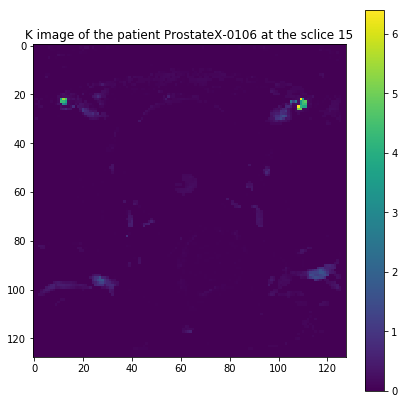

In [26]:
actual_kimage_path = training_kimages_path+"//{}".format(dicom_patient)
actual_kimage_path = actual_kimage_path + "//{}".format(os.listdir(actual_kimage_path)[0])
ct_scan,origin,slices = load_itk(actual_kimage_path)
for i in range (ct_scan.shape[0]):
    plt.figure(figsize=(7,7))
    plt.imshow(ct_scan[i])
    plt.title("K image of the patient {} at the sclice {}".format(dicom_patient,i))
    plt.colorbar()